<a href="https://colab.research.google.com/github/dishang8/Implementation_of_-K-Nearest-Neighbors_Classifier/blob/main/Task1_Implementation_of__K_Nearest_Neighbors_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK 1 : Implementation of  K-Nearest Neighbors Classifier**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 1) iris.csv to 1) iris.csv


In [ ]:
df = pd.read_csv("1) iris.csv")
print(df.columns)
print(df.head())

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
k_values = range(1, 21)
cv_scores = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X_scaled, y, cv=5)
    cv_scores.append(scores.mean())
    print(f"K={k} | CV Accuracy: {scores.mean():.2f}")

K=1 | CV Accuracy: 0.95
K=2 | CV Accuracy: 0.95
K=3 | CV Accuracy: 0.95
K=4 | CV Accuracy: 0.95
K=5 | CV Accuracy: 0.96
K=6 | CV Accuracy: 0.97
K=7 | CV Accuracy: 0.95
K=8 | CV Accuracy: 0.97
K=9 | CV Accuracy: 0.96
K=10 | CV Accuracy: 0.96
K=11 | CV Accuracy: 0.94
K=12 | CV Accuracy: 0.95
K=13 | CV Accuracy: 0.95
K=14 | CV Accuracy: 0.94
K=15 | CV Accuracy: 0.95
K=16 | CV Accuracy: 0.93
K=17 | CV Accuracy: 0.93
K=18 | CV Accuracy: 0.94
K=19 | CV Accuracy: 0.95
K=20 | CV Accuracy: 0.95


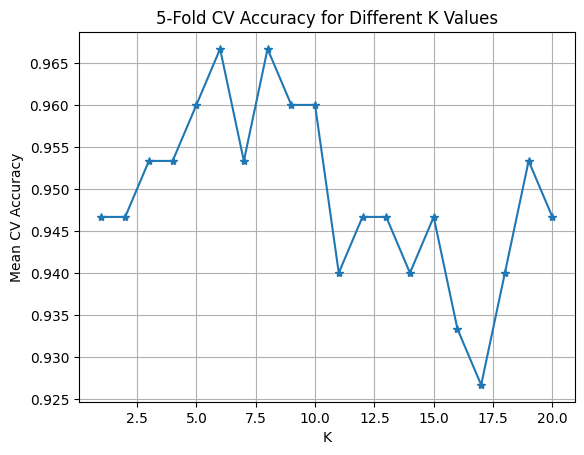

In [ ]:
plt.plot(k_values, cv_scores, marker='*')
plt.title("5-Fold CV Accuracy for Different K Values")
plt.xlabel("K")
plt.ylabel("Mean CV Accuracy")
plt.grid(True)
plt.show()

In [ ]:
best_k = np.argmax(cv_scores) + 1
print(f"\nBest K based on CV: {best_k} | Accuracy: {cv_scores[best_k - 1]:.4f}")


Best K based on CV: 6 | Accuracy: 0.9667


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

final_model = KNeighborsClassifier(n_neighbors=6)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

print("Final Evaluation for K=6")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Final Evaluation for K=6
Accuracy: 1.0

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

